<img src="https://d24cdstip7q8pz.cloudfront.net/t/ineuron1/content/common/images/final%20logo.png" height=50% width=50% alt-text="iNeuron.ai logo">

# 2	Feature Engineering
Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms. Feature engineering can be considered as applied machine learning itself. **[Wikipedia](https://en.wikipedia.org/wiki/Feature_engineering)**

- **Handling Missing Data** 
  - **Data Deletion**
  - **Data Imputation**
- **Handling Imbalanced Data**
  - **Over-Sampling**
  - **Under-Sampling**
- **Handling Outliers**
  - **Univariate method**
  - **Multivariate method**
  - **Minkowski error**
- **Feature Selection** 
  - **Filter Method**
  - **Wrapper Method**
  - **Embedded Methods**
- **Feature Scaling**
  - **Standardization**
  - **Mean Normalization**
  - **Min-Max Scaling**
  - **Unit Vector**
- **Feature Extraction**
  - **PCA (Principle Component Analysis)**
- **Data Encoding**
  - **Binary Encoding**
  - **Nominal Encoding**
    - **One hot encoding**
    - **One hot encoding with multiple categories**
    - **Dummy Encoding**
  - **Ordinal Encoding**
    - **Label Encoding**
    - **Target guided ordinal encoding**
    - **Mean Encoding**
- **Multi-Collinearity**
  - **Pearson correlation coefficient**
  - **Spearman’s Rank correlation**
  - **Kendall Correlation**
  - **VIF**
  - **Pairplot**


## 2.1 Handling Missing Data

There are several ways data can end up with missing values. 

**Example**: Someone with high income being surveyed may choose not to disclose or share their income.

**Note:** Python libraries represent missing numbers as `nan` ("not a number"). 

To facilitate this convention, there are several useful functions for detecting, removing, and replacing null values in `Pandas DataFrame`:
```python
isnull()
notnull()
dropna()
fillna()
replace()
interpolate()
```

You can detect missing values in each columns, and then provide the count of missing values in each column with command:

```python
missing_value_count = data.isnull().sum()
```

Most of the libraries such as `scikit-learn` will give an error during model building using data with missing values. So it is always recommended and needed to choose one of this strategies below.

**Missing data can be handeled in two ways:**

1) **Deletion of data**

2) **Imputation of data in the missing place**

![image1](FeatureEng_Imgs/FE1.png)



### 2.1.1 Data Deletion
Data can be deleted in three ways;

- Deleting Rows
- Deleting columns

**Example**

A simple dataset has created
```python
# importing pandas as pd 
import pandas as pd 
  
# importing numpy as np 
import numpy as np 
  
# dictionary of lists to store values
dict = {'Col1':[85, 90, 75, 51, 28, np.nan, 95], 
        'Col2': [54, 78, 91, 30, 45, 56, np.nan], 
        'Col3':[10, 87, 99, 86, 40, 80, 98],
        'Col4':[10, 47, 99, np.nan, 40, 80, 81],
        'Col5':[50, 87, 59, 25, 40, 54, 100]} 
  
# creating a dataframe from dictionary
data = pd.DataFrame(dict) 
```

In [3]:
# importing pandas as pd 
import pandas as pd 

# importing numpy as np 
import numpy as np 

# dictionary of lists to store values
dict = {'Col1':[85, 90, 75, 51, 28, np.nan, 95], 
        'Col2': [54, 78, 91, 30, 45, 56, np.nan], 
        'Col3':[10, 87, 99, 86, 40, 80, 98],
        'Col4':[10, 47, 99, np.nan, 40, 80, 81],
        'Col5':[50, 87, 59, 25, 40, 54, 100]} 

# creating a dataframe from dictionary
data = pd.DataFrame(dict) 
data

,Col1,Col2,Col3,Col4,Col5
0,85.0,54.0,10,10.0,50
1,90.0,78.0,87,47.0,87
2,75.0,91.0,99,99.0,59
3,51.0,30.0,86,NaN,25
4,28.0,45.0,40,40.0,40
5,NaN,56.0,80,80.0,54
6,95.0,NaN,98,81.0,100


In [4]:
# using isnull() function   
data.isnull() 

,Col1,Col2,Col3,Col4,Col5
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,True,False
4,False,False,False,False,False
5,True,False,False,False,False
6,False,True,False,False,False


In [6]:
# using isnull() function   
data.isnull().sum() 

Col1    1
Col2    1
Col3    0
Col4    1
Col5    0
dtype: int64

#### Deleting Rows (Listwise Deletion)
- `inplace` is `True` means it change the data as per the performed operation 
- By default `inplace` is `False`
- `axis = 0` by default for **row wise operation** and `axis = 1` for **column wise operation** 

```python
## Function to delete row wise null values
data.dropna(inplace=True)
```

In [8]:
df=data.dropna(axis=0)
df

,Col1,Col2,Col3,Col4,Col5
0,85.0,54.0,10,10.0,50
1,90.0,78.0,87,47.0,87
2,75.0,91.0,99,99.0,59
4,28.0,45.0,40,40.0,40


#### Deleting columns

In general, it is always recommended to keep data rather than discard it. But sometimes you can drop column if the 60% of data is missing but only if that column is insignificant. 

**Note:** Previously its mentioned that imputation is always a preferable choice over the dropping.
```python
data.dropna(axis=1,inplace=True)
```

In [24]:
df=data.dropna(axis=1)
df

,Col3,Col5
0,10,50
1,87,87
2,99,59
3,86,25
4,40,40
5,80,54
6,98,100


### 2.1.2 Data Imputation

Data imputation process is always a preferable choice and divided into two types of problem;

- **Time-Series Problem**
- **General Problem**

#### Time-Series Problem

- `Mean`, `Median`, `Mode` and `Randam Sample Imputation` works well when data don't have both trend and seasonality.
- `Linear Interpolation` method works well for a time series with some trend but it is not suitable for the seasonal data.
- `Seasonal Adjustment + Linear Interpolation` works well for the data with both seasonality and trend.

**Note:** More we are going to discuss in Time-Series Module


#### General Problem

In general problem, we have encounter two type of data types;
- **Categorical**
- **Continuous**

**Note: Univariate vs. Multivariate Imputation**

- One type of imputation algorithm is univariate, which imputes values in the i-th feature dimension using only non-missing values in that feature dimension (e.g. `impute.SimpleImputer`). 
- By contrast, multivariate imputation algorithms use the entire set of available feature dimensions to estimate the missing values (e.g. `impute.IterativeImputer`).

In [28]:
'''Here, we are going to use a `employees.csv` dataset to cover-up possible method of data imputation'''

# importing pandas package 
import pandas as pd

# loading dataframe from csv file 
data=pd.read_csv("Datasets/employees.csv")
data.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


In [29]:
## To check missing values in column wise
data.isnull().sum()

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

##### Make missing values as one class

In [30]:
'''Here we are going to fill all present null values in a Gender column with “Unknown_Gender”. 
After replacing there will be no null values in gender column'''

# filling a null values by fillna()  
data["Gender"].fillna("No Gender", inplace = True)  

## To check missing values in column wise
data.isnull().sum()

First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management    67
Team                 43
dtype: int64

In [31]:
data["Gender"].value_counts()

Female       431
Male         424
No Gender    145
Name: Gender, dtype: int64

##### Simple Imputer

In [38]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import Imputer

data = pd.DataFrame([[10, 20],[np.nan, 30],[10, np.nan],[50, 40]])

print("Original Data :\n", data) 
print('\n','-'*50)

# missing_values type for imputation
SI = SimpleImputer(strategy="most_frequent")
data=SI.fit_transform(data)
print("Imputed Data :\n", data) 

Original Data :
       0     1
0  10.0  20.0
1   NaN  30.0
2  10.0   NaN
3  50.0  40.0

 --------------------------------------------------
Imputed Data :
 [[10. 20.]
 [10. 30.]
 [10. 20.]
 [50. 40.]]


##### Multiple Imputation

**Note:** This estimator is still experimental in `sklearn`: the predictions and the API might change without any deprecation cycle. To use it, you need to explicitly `import enable_iterative_imputer`:

In [9]:
import numpy as np
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer 
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit([[1, 2], [3, 6], [4, 8], [np.nan, 3], [7, np.nan]])
IterativeImputer(random_state=0)
X_test = [[np.nan, 2], [6, np.nan], [np.nan, 6]]

# the model learns that the second feature is double the first
print(np.round(imp.transform(X_test)))

[[ 1.  2.]
 [ 6. 12.]
 [ 3.  6.]]


**It's needed newer verson of sklearn to use `from sklearn.impute import IterativeImputer`**.
In my case it works when 
```cmd
conda update anaconda
conda update scikit-learn
```
Then restart your jupyter kernal

'or'

**Auto Impute** library can be used
```cmd
pip install autoimpute
```
**[More Information](https://scikit-learn.org/stable/modules/impute.html) of SimpleImputer and IterativeImputer**

##### Back-fill or Forward-fill
For Back-fill or forward-fill to propagate next or previous values respectively:
```python
#Back fill 
data.fillna(method='bfill')
#Forward-fill
data.fillna(method='ffill')
#one can also specify an axis to propagate (1 is for rows and 0 is for columns)
data.fillna(method='bfill', axis=1)
```

In [42]:
# importing pandas as pd 
import pandas as pd 

# importing numpy as np 
import numpy as np 

# dictionary of lists to store values
dict = {'Col1':[85, 90, 75, 51, 28, np.nan, 95], 
        'Col2': [54, 78, 91, 30, 45, 56, np.nan], 
        'Col3':[10, 87, 99, 86, 40, 80, 98],
        'Col4':[10, 47, 99, np.nan, 40, 80, 81],
        'Col5':[50, 87, 59, 25, 40, 54, 100]} 

# creating a dataframe from dictionary
data = pd.DataFrame(dict) 
print("Original Data :\n", data) 
print('\n','-'*50)

#Back fill 
new_df=data.fillna(method='bfill')
new_df

Original Data :
    Col1  Col2  Col3  Col4  Col5
0  85.0  54.0    10  10.0    50
1  90.0  78.0    87  47.0    87
2  75.0  91.0    99  99.0    59
3  51.0  30.0    86   NaN    25
4  28.0  45.0    40  40.0    40
5   NaN  56.0    80  80.0    54
6  95.0   NaN    98  81.0   100

 --------------------------------------------------


,Col1,Col2,Col3,Col4,Col5
0,85.0,54.0,10,10.0,50
1,90.0,78.0,87,47.0,87
2,75.0,91.0,99,99.0,59
3,51.0,30.0,86,40.0,25
4,28.0,45.0,40,40.0,40
5,95.0,56.0,80,80.0,54
6,95.0,NaN,98,81.0,100


In [37]:
#one can also specify an axis to propagate (1 is for rows and 0 is for columns)
new_df=data.fillna(method='bfill', axis=1)
new_df

,Col1,Col2,Col3,Col4,Col5
0,85.0,54.0,10.0,10.0,50.0
1,90.0,78.0,87.0,47.0,87.0
2,75.0,91.0,99.0,99.0,59.0
3,51.0,30.0,86.0,25.0,25.0
4,28.0,45.0,40.0,40.0,40.0
5,56.0,56.0,80.0,80.0,54.0
6,95.0,98.0,98.0,81.0,100.0


In [38]:
#Forward-fill
new_df=data.fillna(method='ffill')
new_df

,Col1,Col2,Col3,Col4,Col5
0,85.0,54.0,10,10.0,50
1,90.0,78.0,87,47.0,87
2,75.0,91.0,99,99.0,59
3,51.0,30.0,86,99.0,25
4,28.0,45.0,40,40.0,40
5,28.0,56.0,80,80.0,54
6,95.0,56.0,98,81.0,100


##### Replace using mean, median and mode

In [44]:
## Mean
mean = data.mean()
df=data.fillna(mean)
df

,Col1,Col2,Col3,Col4,Col5
0,85.000000,54.0,10,10.0,50
1,90.000000,78.0,87,47.0,87
2,75.000000,91.0,99,99.0,59
3,51.000000,30.0,86,59.5,25
4,28.000000,45.0,40,40.0,40
5,70.666667,56.0,80,80.0,54
6,95.000000,59.0,98,81.0,100


In [43]:
## Median
median = data.median()
df=data.fillna(median)
df

,Col1,Col2,Col3,Col4,Col5
0,85.0,54.0,10,10.0,50
1,90.0,78.0,87,47.0,87
2,75.0,91.0,99,99.0,59
3,51.0,30.0,86,63.5,25
4,28.0,45.0,40,40.0,40
5,80.0,56.0,80,80.0,54
6,95.0,55.0,98,81.0,100


In [45]:
## Mode
mode = data.mode()
df=data.fillna(mode)
df

,Col1,Col2,Col3,Col4,Col5
0,85.0,54.0,10,10.0,50
1,90.0,78.0,87,47.0,87
2,75.0,91.0,99,99.0,59
3,51.0,30.0,86,80.0,25
4,28.0,45.0,40,40.0,40
5,95.0,56.0,80,80.0,54
6,95.0,NaN,98,81.0,100


##### Logistic Regression
It is a statistical model that uses a logistic function to model a dependent variable. The dependent variable is a binary values labeled “0” and “1”.

```python
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Imupte mean values
imp=Imputer(missing_values="NaN", strategy="mean", axis=0)

logmodel = LogisticRegression()

## Pipeline steps
steps=[('imputation',imp),('logistic_regression',logmodel)]

pipeline=Pipeline(steps)

## Using train_test_split to split the dataset
X_train, X_test, Y_train, Y_test=train_test_split(X, y, test_size=0.3, random_state=42)

## Fitting train and test data
pipeline.fit(X_train, Y_train)

y_pred=pipeline.predict(X_test)
pipeline.score(X_test, Y_test)
```

##### Linear Regression
It is a statistical model that uses a linear predictor function to model a dependent variable. The relationship between the dependent variable y and the inputs x is linear. 

```python
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearModel
from sklearn.model_selection import train_test_split

## Imupte mean values
imp=Imputer(missing_values="NaN", strategy="mean", axis=0)

linearmodel = LinearModel()

## Pipeline steps
steps=[('imputation',imp),('linear_regression',linearmodel)]

pipeline=Pipeline(steps)

## Using train_test_split to split the dataset
X_train, X_test, Y_train, Y_test=train_test_split(X, y, test_size=0.3, random_state=42)

## Fitting train and test data
pipeline.fit(X_train, Y_train)

y_pred=pipeline.predict(X_test)
pipeline.score(X_test, Y_test)
```

#### KNN Imputer
- The KNNImputer class provides imputation for filling in missing values using the k-Nearest Neighbors approach. 
- By default, a euclidean distance metric that supports missing values, nan_euclidean_distances, is used to find the nearest neighbors. 
- Each missing feature is imputed using values from n_neighbors nearest neighbors that have a value for the feature. The feature of the neighbors are averaged uniformly or weighted by distance to each neighbor.

**Note:** The method requires the selection of the number of nearest neighbors, and a distance metric. KNN can predict both discrete attributes (the most frequent value among the k nearest neighbors) and continuous attributes (the mean among the k nearest neighbors)

**The distance metric varies according to the type of data:**
1. Continuous Data: The commonly used distance metrics for continuous data are Euclidean, Manhattan and Cosine
2. Categorical Data: Hamming distance is generally used in this case.

In [3]:
import numpy as np
from sklearn.impute import KNNImputer

## Dataset
data = [[1, 5, np.nan], [3, np.nan, 7], [np.nan, 5, 5], [8, 7, 7]]

## Applying KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputer.fit_transform(data)


array([[1., 5., 6.],
       [3., 5., 7.],
       [2., 5., 5.],
       [8., 7., 7.]])

## 2.2 Handling Imbalanced Data

In machine learning classification, imbalanced classes are a common problem, where there are a disproportionate ratio of in each class. Class imbalance can be found in many different areas including spam filtering, medical diagnosis and fraud detection.

#### The Problem with Imbalanced Classes
- Most machine learning approches are designed to maximize accuracy and reduce error. It work best when number of samples in each class are about equal. 

**Two ways are possible to handle imbalanced data;**
- **Oversample minority class**
- **Undersample majority class**

**Dataset Used:** The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (`'yes'`) or not (`'no'`) subscribed.

>**Note:** Here we will use `imblearn` library for the operation. It can installed by `pip install imblearn`

### 2.2.1 Oversample minority class

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


no     36548
yes     4640
Name: y, dtype: int64

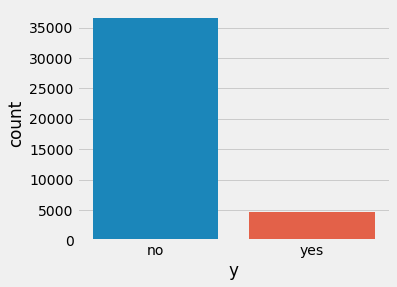

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## This used to change the default style
import matplotlib.style as style
style.use('fivethirtyeight')

%matplotlib inline


data_path="Datasets/bank-additional-full.csv"
data=pd.read_csv(data_path,sep=';')

## Fixing the figure size
plt.figure(figsize=(5,4))

## Ploting Y column to show the data imbalance
Y = data["y"]
ax=sns.countplot(x="y", data=data)
Y.value_counts()

In [23]:
## Importing RandomOverSampler from imblearn library
from imblearn.over_sampling import RandomOverSampler

rdsmple = RandomOverSampler()

X=data.drop('y', axis=1)

print('Orignal data shape',X.shape)

x_sampled, y_sampled = rdsmple.fit_sample(X, Y)

print('Sampled data shape',x_sampled.shape)

Orignal data shape (41188, 20)
Sampled data shape (73096, 20)


In [24]:
## Orignal Y value counts
Y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [25]:
## Sampled Y value counts
y_sampled.value_counts()

yes    36548
no     36548
Name: y, dtype: int64

### 2.2.2 Undersample majority class

In [26]:
## Importing RandomOverSampler from imblearn library
from imblearn.under_sampling import RandomUnderSampler

rdsmple = RandomUnderSampler()

X=data.drop('y', axis=1)

print('Orignal data shape',X.shape)

x_sampled, y_sampled = rdsmple.fit_sample(X, Y)

print('Sampled data shape',x_sampled.shape)

Orignal data shape (41188, 20)
Sampled data shape (9280, 20)


In [27]:
## Orignal Y value counts
Y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [28]:
## Sampled Y value counts
y_sampled.value_counts()

no     4640
yes    4640
Name: y, dtype: int64

## 2.3 Handling Outliers
- Data outliers can mislead and indulge the training operation which results less accurate models and longer training period.
- Depending upon the problem statement and context, the outlier deserves some attention.

**Examples**
- Titanic dataset where our target is to detect whether the person is survived or not. Here we can remove the outliers.
- Credit card fraud detection, here we should keep the outliers
- In sales forecasting, here we should keep the outliers

**Here, we present three different methods to deal with outliers:**
- **Univariate method:** It search on one variable for data points which have extreme values.
- **Multivariate method:** In this process we inspect for unusual patterns of all the variables.
- **Minkowski error:** This method is used to reduces the influence of existing outliers in the training phase.

>**Note:** There are several machine learning algorithm which are sensitive towards outliers, so its required to apply any of these above mentioned technique to deal with outliers before training process.



### Machine Learning Models Sensitivity towards Outliers

Knowledge about machine learning models sensitivity towards Outliers is very much important for implementation point of view.
Here is list of some popular machine learning model and their respective sensitivity towards the outliers.

|Algorithms|Sensitivity towards outliers|
|-|-|
|Naive Bayes Classifier|Not Sensitive to Outliers (It computed based upon probablity)|
|SVM|Not Sensitive to Outliers (SVF formula doesn’t affected by outliers) |       
|Linear Regression|Sensitive to Outliers|
|Logistic Regression|Sensitive to Outliers|
|Decision Tree Regressor or Classifier|Not Sensitive|
|Ensemble (GB, RF and XGBoost) |Not Sensitive|
|KNN|Not Sensitive |
|Kmeans|Sensitive|
|Hierarchal|Sensitive |
|PCA|Sensitive |
|Neural Networks| Sensitive|

>**Note:** It's always recommended to check the outliers before appling any algorithm on training data.

### 2.3.1 Univariate method
- The box plot can be used to check the presence of outliers in a variable. Box plots use the median, the lower and upper quartiles.
- In Univariate method two scenarios is possible:
     - Data is Normally Distributed / Gaussian Distributed
     - Data is Skewed 

In [48]:
'''For univariate method analysis we will consider the titanic dataset, 
which is commanly available in Kaggle'''

import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
%matplotlib inline

data=pd.read_csv('Datasets/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
## Checking null value in 'Age' column
data['Age'].isnull().sum()

177

In [11]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### Data is Normally Distributed / Gaussian Distributed

Text(0.5, 1.0, 'Histogram plot while dropping nan')

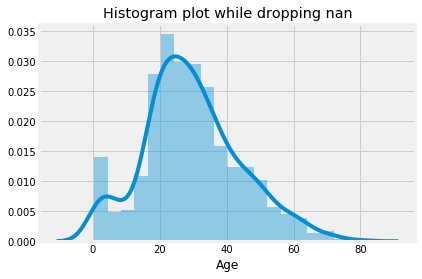

In [12]:
## As we got null value, so here we apply outliers in missing values
import seaborn as sns

fig1=sns.distplot(data['Age'].dropna())
fig1.set_title('Histogram plot while dropping nan')


Data is normally distributed 

Text(0.5, 1.0, 'Histogram plot while filling outliers in nan place')

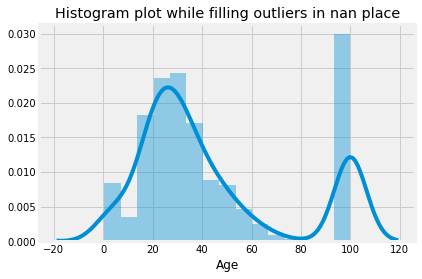

In [13]:
fig2=sns.distplot(data['Age'].fillna(100))
fig2.set_title('Histogram plot while filling outliers in nan place')

>**Note:** If dataset is small we can fill the missinig values, refer section of handling missing values

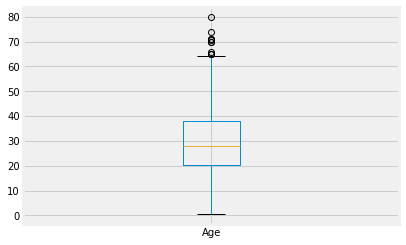

In [14]:
## Checking Outliers using box plot
data.boxplot(column="Age")

As we know our data is normally distributed, so we will calculate the boundaries which differentiates the outliers.

<img src="FeatureEng_Imgs/FE2.png" width="600"/>
[Source](https://en.wikipedia.org/wiki/Standard_deviation)

Based upon this diagram $3 * standard deviation$ will cover 99.7 % value, similar approach has applied down there

In [6]:
## We need to compute the lower and upper boundary first
lower_boundary=data['Age'].mean() - 3* data['Age'].std()
upper_boundary=data['Age'].mean() + 3* data['Age'].std()

## Mean calculation
mean=data['Age'].mean()
print(f'lower boundary:{lower_boundary} \nUpper boundary:{upper_boundary},\nMean:{mean}')


lower boundary:-13.88037434994331 
Upper boundary:73.27860964406095,
Mean:29.69911764705882


In [21]:
## As we got upper boundary 73, if values are greater than 73 will replaced to 73
## Age value is not lesser than lower boundary, so no need to apply it
data.loc[data['Age']>=73,'Age']=73

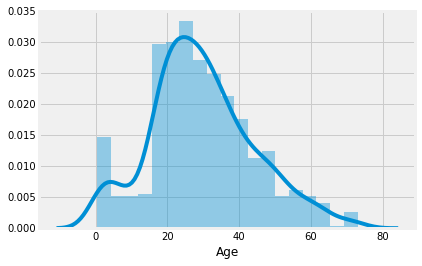

In [26]:
sns.distplot(data['Age'].dropna())

In [27]:
data.Age.describe()

count    714.000000
mean      29.687913
std       14.490589
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       73.000000
Name: Age, dtype: float64

#### Data is Skewed

Text(0, 0.5, 'No of passenger')

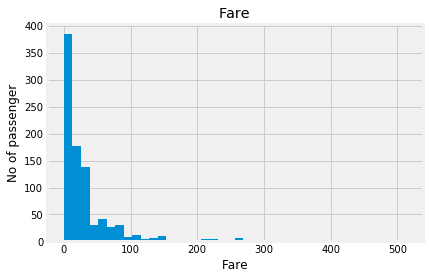

In [28]:
figure=data.Fare.hist(bins=40)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

Considering `Fare` column, we can say the data is right skewed. So for `Skewed` data we can apply **`IQR (Interquantile range)`** method.

In [29]:
## Computing the IQR to calculate the boundaries
IQR=data.Fare.quantile(0.75)-data.Fare.quantile(0.25)

In [30]:
## Mid outliers (IQR *1.5)
lower_level=data['Fare'].quantile(0.25)-(IQR*1.5)
upper_level=data['Fare'].quantile(0.75)+(IQR*1.5)
print(f'lower boundary:{lower_level} \nUpper boundary:{upper_level}')

lower boundary:-26.724 
Upper boundary:65.6344


In [31]:
## Extreme outliers (IQR *3)
lower_level=data['Fare'].quantile(0.25)-(IQR*3)
upper_level=data['Fare'].quantile(0.75)+(IQR*3)
print(f'lower boundary:{lower_level} \nUpper boundary:{upper_level}')

lower boundary:-61.358399999999996 
Upper boundary:100.2688


In [32]:
## As we got upper boundary 100, if values are greater than 100 will replaced to 100
## Fare value is not lesser than lower boundary, so no need to apply it
data.loc[data['Fare']>=100,'Fare']=100

Text(0, 0.5, 'No of passenger')

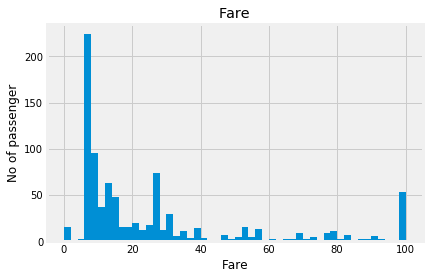

In [33]:
## Histogram plot after replacing outliers
figure=data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

>**Note:** Similar approach can be applied on left skewed data

### 2.3.2 Multivariate method
The multivariate method tries to solve that by building a predictive model using all the data available and cleaning those instances with errors above a given value. [Source](https://www.neuraldesigner.com/blog/3_methods_to_deal_with_outliers)

### 2.3.3 Minkowski error

`Minkowski error` is consider to be the loss index which is less sensitive towards the outliers than the standard MSE (mean squared error).

The MSE compute each instance error by taking square, so it provide big outliers contribution to the total error,

$$MSE = ∑(predicted-orignal)^2 / number of instances$$

The Minkowski error solves through considering smaller value than 2 at each instance. This considered number is called Minkowski parameter, and help to reduces the effect of outliers on total error,

$$MinkowskiError = ∑(predicted-orignal)^{m} / number of instances$$

`m` is minkowski_parameter and 1.5 is considered to be the common value for the Minkowski parameter.

For example, if an outlier has error value of 10, so the squared error for this will be $10^2=100$, while the Minkowski error is 
$10^{1.5}=31.62$
.

## 2.4 Feature Selection
Making the right choices about which variable to choose for your predictive models is very much important in feature engineering process.

Feature selection plays a vital role in creating an effective predictive model and broadly categories into 3 method:
- **Filter Method**
- **Wrapper Method**
- **Embedded Method**

**Dataset:** The boston house-prices dataset from sklearn (regression)

In [2]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
import seaborn as sns

#Loading the dataset
df = load_boston()
data = pd.DataFrame(df.data, columns = df.feature_names)
data["MEDV"] = df.target

#Feature Matrix
X = data.drop("MEDV",1)

 #Target Variable
y = data["MEDV"]

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 2.4.1 Filter Method
Filter methods generally used in a preprocessing step. The selection of features is independent of any machine learning algorithms. However, selection of features are based upon their scores in various statistical tests for their correlation with the target variable. The block diagram shows the working mechanism of `Filter Method`

<img src="FeatureEng_Imgs/FE3.png" width="600"/>

**Respective of Continuous & Categorical variables these approach can be applied;**

|Feature\Response|Continuous|Categorical|
|-|-|-|
|Continuous|Pearson’s Correlation|LDA|
|Categorical|ANOVA|Chi-Square|

- It used to filter and consider only the subset of relevant features. 
- After selecting the features, the model is built. 
- Here, the filtering is done using correlation matrix and it is most commonly done using `Pearson correlation`.

#### Pearson Correlation

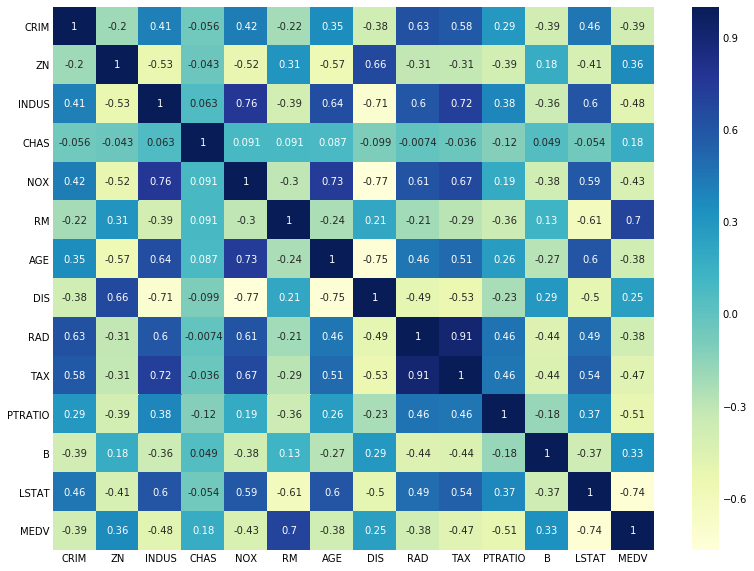

In [3]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()

In [7]:
#Correlation with output variable
target_corr = abs(corr["MEDV"])

#Selecting highly correlated features which value greater than 0.5
relevant_features = target_corr[target_corr>0.5]
relevant_features

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

>**Note:** The Pearson correlation coefficient has values ranges from -1 to 1
- A value exact 0 indicates no correlation
- A value closer to 0 indicates weaker correlation 
- A value closer to 1 indicates stronger positive correlation
- A value closer to -1 indicates stronger negative correlation

#### LDA (Linear Discriminant Analysis)
- [Linear discriminant analysis (LDA)](https://en.wikipedia.org/wiki/Linear_discriminant_analysis) is a method used in statistics, pattern recognition, and machine learning to find a linear combination of features that characterizes or separates two or more classes of objects or events. 
- The resulting combination may be used as a `linear classifier`, or, more commonly, for `dimensionality reduction` before later classification.
- `LDA` is also closely related to `principal component analysis (PCA)` and factor analysis in that they both look for linear combinations of variables which best explain the data.
- The `Scikit-Learn` library contains built-in classes for performing LDA on the dataset. Here we will apply LDA on the `Iris dataset`.

In [9]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
data = pd.read_csv(url, names=names)
data.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
from sklearn.model_selection import train_test_split

X = data.iloc[:, 0:4].values
y = data.iloc[:, 4].values

## Divides data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [27]:
## Perform feature scaling for LDA
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
## Perform LDA with Scikit-Learn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2) ## Number of LDA compnents
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [30]:
## Training and Making Predictions using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Confusion Matrix:
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


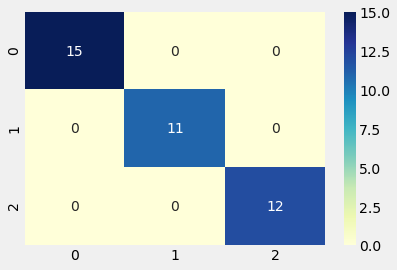


Accuracy: 1.0


In [39]:
## Evaluating the Performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n',cm)
sns.heatmap(cm, annot=True, cmap="YlGnBu")
plt.show()

print('\nAccuracy: ' + str(accuracy_score(y_test, y_pred)))

>**Note:** In case of uniformly distributed data, LDA almost always performs better than PCA. However if the data is highly skewed (irregularly distributed) then it is advised to use PCA since LDA can be biased towards the majority class.

>**Note:** It is beneficial that PCA can be applied to labeled as well as unlabeled data since it doesn't rely on the output labels. On the other hand, LDA requires output classes for finding linear discriminants and hence requires labeled data.

#### ANOVA

- Analysis of variance [(ANOVA)](https://en.wikipedia.org/wiki/Analysis_of_variance) is a collection of statistical models and their associated estimation procedures (such as the "variation" among and between groups) used to analyze the differences among group means in a sample. 
- In its simplest form, ANOVA provides a statistical test of whether two or more population means are equal, and therefore generalizes the t-test beyond two means.

- The `scikit-learn` library provides an implementation of the `ANOVA f-test` in the [f_classif()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html) function. This function can be used in a feature selection strategy, such as selecting the top k most relevant features which have largest values via the [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) class.

**Example**, we use `diabetes` dataset and define the `SelectKBest` class to use the `f_classif()` function and select all features, then performing transform of train and test data.

In [46]:
# Example of anova f-test feature selection for numerical data
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
import pandas as pd

# load the dataset as a pandas DataFrame
data = pd.read_csv('Datasets/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [48]:
## split into input (X) and output (y) variables
## Feature Matrix
X = data.drop("Outcome",1)

## Target Variable
y = data["Outcome"]

In [49]:
## split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [50]:
## Configure to select all the features
fs = SelectKBest(score_func=f_classif, k='all').fit(X_train, y_train) ## Selecting all features



Feature 0: 25.761747
Feature 1: 165.563305
Feature 2: 4.610080
Feature 3: 2.827466
Feature 4: 9.312464
Feature 5: 63.284326
Feature 6: 12.625109
Feature 7: 50.624447


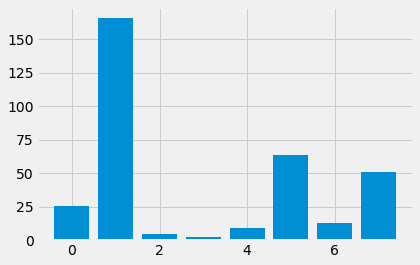

In [51]:
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

>**Note:** Features 1, 5, and 7 are seems to be most relevant. Perform `SelectKBest(score_func=f_classif, k=4)`for top 4 features.

>**Note:** ANOVA is the synthesis of several ideas and it is used for multiple purposes. As a consequence, it is difficult to define concisely or precisely.

### Chi-square

- A [chi-squared](https://en.wikipedia.org/wiki/Chi-squared_test) test, also written as $χ^2$ test, is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test and variants thereof.
- Pearson's chi-squared test is used to determine whether there is a statistically significant difference between the expected frequencies and the observed frequencies in one or more categories of a contingency table.
- Chi-square test is used for categorical features in a dataset. The calculation of Chi-square [(`chi2` from sklearn)](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2) is done between each feature and the target, then select the desired number of features with best Chi-square scores using `SelectKBest` from sklearn.

Chi-square score is given by :

$$χ^2=(Observed Frequency-Expected Frequency)^2/Expected Frequency$$ 

In [57]:
# Load libraries 
from sklearn.datasets import load_iris 
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 
import matplotlib.pyplot as plt
import pandas as pd

# Load iris data 
df = load_iris() 
data = pd.DataFrame(df.data, columns = df.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [59]:
# Create features and target 
X = df.data 
y = df.target 

# Converting data to integers to get categorical values (Chi-square works with categorical values) 
X = X.astype(int) 
pd.DataFrame(X).head()

,0,1,2,3
0,5,3,1,0
1,4,3,1,0
2,4,3,1,0
3,4,3,1,0
4,5,3,1,0


In [60]:
# Two features with highest chi-squared statistics values are selected 
chi2_f = SelectKBest(chi2, k = 2) 

## Get X_kbest features after fit & transform of X data
X_kbest = chi2_f.fit_transform(X, y) 

# Reduced features 
print('Original feature number:', X.shape[1]) 
print('Reduced feature number:', X_kbest.shape[1]) 


Original feature number: 4
Reduced feature number: 2


Feature 0: 10.287129
Feature 1: 5.022670
Feature 2: 133.068548
Feature 3: 74.279070


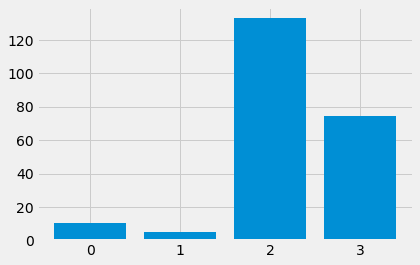

In [61]:
# what are scores for the features
for i in range(len(chi2_f.scores_)):
    print('Feature %d: %f' % (i, chi2_f.scores_[i]))
    
# plot the scores
plt.bar([i for i in range(len(chi2_f.scores_))], chi2_f.scores_)
plt.show()

>**Note:** Two features with highest chi-squared statistics values are selected 

**Final Conclusion of Filter Method**
- increased the interpretability of the model.
- reduced the complexity of the model.
- reduced the training time of the model.

### 2.4.2 Wrapper Method

As [wrapper methods](https://en.wikipedia.org/wiki/Feature_selection) train a new model for each subset, they are very computationally intensive, but usually provide the best performing feature set for that particular type of model or typical problem. The block diagram shows the working mechanism of `Wrapper Method`
<img src="FeatureEng_Imgs/FE4.png" width="600"/>

The evaluation criterion is simply the performance measure which depends on the type of problem.

>**Regression evaluation criterion**
>- p-values
- R-squared
- Adjusted R-squared

>**classification evaluation criterion**
>- Accuracy
- Precision
- Recall
- F1-score, etc. 

**Most commonly used techniques under wrapper methods are:**
- **Forward selection**
- **Backward elimination**
- **Recursive Feature elimination**

#### Forward Selection

- Here, we start with a null model and then start fitting the model with each feature one at a time and select the feature with the minimum p-value. 
- Now fit a model with two features by trying combinations of the earlier selected feature with all other remaining features. Again select the feature with the minimum p-value. 
- Now fit a model with three features by trying combinations of two previously selected features with other remaining features.
- Repeat this process until we have a set of selected features with a p-value of individual feature less than the significance level.

Install mlxtend for Forward selection & Backward elimination
```cmd
pip install mlxtend
```

In [7]:
import pandas as pd
from sklearn.datasets import load_boston

boston = load_boston()
data = pd.DataFrame(boston.data, columns = boston.feature_names)
data['Price'] = boston.target

## feature matrix 
X = data.drop("Price", 1)  

## target feature
y = data['Price']               
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

# Sequential Forward Selection(sfs), forward = True and floating = False are for forward selection technique.
sfs = SFS(LinearRegression(),
           k_features=11,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)## cv corresponds cross validation

In [3]:
sfs.fit(X, y)

# to get the final set of features
print('Feature Names: ',sfs.k_feature_names_)  

Feature Names:  ('CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')


In [4]:
# to get the Accuracy score
print('Accuracy value: ',sfs.k_score_) 

Accuracy value:  0.7405822802569575


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


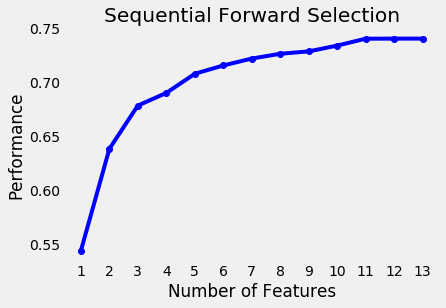

In [128]:
##The visualization can be achieved through `plot_sequential_feature_selection()` function available in mlxtend.plotting module.
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

>**Note:** After increasing k_features value from 11, model is not able to increase the Accuracy. Finally selected `k_features=11`

>**Note:** `k_features` indicates the selected number of features. It can be any random value, but the optimal value can be found by analyzing and visualizing the scores different of features.

#### Backward elimination
- In backward elimination, we start with the full model which includes all the independent variables and then remove the insignificant feature with highest p-value. 
- This process repeats again and again until we have the final set of significant features.

In [41]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Sequential Forward Selection(sfs), forward = False and floating = False are for forward selection technique.
sfs = SFS(LinearRegression(),
           k_features=11,
           forward=False,
           floating=False,
           scoring = 'r2',
           cv = 0)## cv corresponds cross validation

In [42]:
sfs.fit(X, y)

# to get the final set of features
print('Feature Names: ',sfs.k_feature_names_)  

Feature Names:  ('CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')


In [43]:
# to get the Accuracy score
print('Accuracy value: ',sfs.k_score_) 

Accuracy value:  0.7405822802569575


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


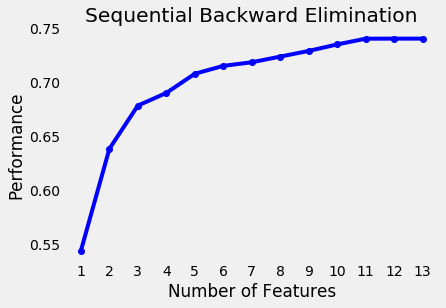

In [40]:
##The visualization can be achieved through `plot_sequential_feature_selection()` function 
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Backward Elimination')
plt.grid()
plt.show()

>**Note:** After applying several k_features value, 11 found to be optimal feature number for this model Accuracy. Finally selected `k_features=11`

>**Note:** `k_features` indicates the selected number of features. It can be any random value, but the optimal value can be found by analyzing and visualizing the scores different of features.

#### RFE (Recursive Feature Elimination)
- It works by recursively removing attributes and building a model on those attributes that remain. 
- It uses accuracy metric to rank the feature according to their importance. 
- The RFE method takes the model to be used and the number of required features as input. 
- It support ranking (`1` - Higher, `2` - lower than 1) and, True for relevant feature and False for irrelevant feature.


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

LR_model = LinearRegression()
#Initializing RFE model
rfe = RFE(LR_model, 6) #Here randomly we selected feature number 10

#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  

#Fitting the data to model
LR_model.fit(X_rfe,y)
print('Support: ',rfe.support_)
print('Ranking: ',rfe.ranking_)
print('RFE Accuracy: ',rfe.score(X,y))

Support:  [False False False  True  True  True False  True False False  True False
  True]
Ranking:  [3 5 4 1 1 1 8 1 2 6 1 7 1]
RFE Accuracy:  0.7157742117396082


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=6 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


***To get optimal number of feature, we need to iterate over feature number***

In [49]:
score=[]
for i in range(1,X.shape[1]+1):
    
    #Initializing RFE model
    rfe = RFE(LR_model, i) 

    #Transforming data using RFE
    X_rfe = rfe.fit_transform(X,y)  

    #Fitting the data to model
    LR_model.fit(X_rfe,y)
    
    ## Geting accuracy
    val=rfe.score(X,y)
    
    score.append(val)
print(score)

[0.1826030425016988, 0.535438013080613, 0.5555737130590868, 0.6156465556218185, 0.6336210768240027, 0.7157742117396082, 0.7171450343413888, 0.7232588148621941, 0.72434488837625, 0.728290740634622, 0.7342674984601643, 0.7406412165505145, 0.7406426641094095]


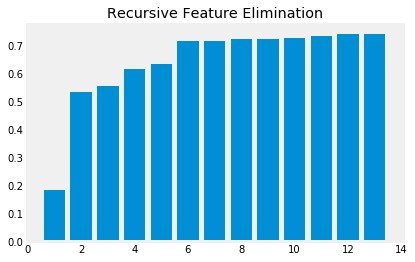

In [46]:
## Visulize score w.r.t considered number of features
import matplotlib.pyplot as plt

plt.bar(range(1,X.shape[1]+1),score)
plt.title('Recursive Feature Elimination')
plt.grid()
plt.show()

As per graphical analysis and obtained accuracy the optimal number of features can be considered

### 2.4.3 Embedded Methods
[Embedded methods](https://en.wikipedia.org/wiki/Feature_selection) have been recently proposed that try to combine the advantages of both previous methods. A learning algorithm takes advantage of its own variable selection process and performs feature selection and classification simultaneously. 
- They are iterative in a sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration. 
- Regularization methods are the most commonly used embedded methods which penalize a feature given a coefficient threshold.

<img src="FeatureEng_Imgs/FE5.png" width="600"/>

>**Note:** The major advantage of `ridge regression` is coefficient shrinkage and reducing model complexity, while `Lasso` along with shrinking coefficients, lasso performs feature selection as well.

#### L1-based feature selection (Lasso)
Linear models penalized with the L1 norm have sparse solutions: many of their estimated coefficients are zero. When the goal is to reduce the dimensionality of the data to use with another classifier, they can be used along with [`feature_selection.SelectFromModel`](https://scikit-learn.org/stable/modules/feature_selection.html) to select the non-zero coefficients. In particular, sparse estimators useful for this purpose are the `linear_model.Lasso` for regression, and of `linear_model.LogisticRegression` and `svm.LinearSVC` for classification.

In [51]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

## Loading iris dataset
X, y = load_iris(return_X_y=True)

print('Intial data shape',X.shape)

## Model building
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)

## Getting reduced number of feature by lasso
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)

print('Final data shape',X_new.shape)

Intial data shape (150, 4)
Final data shape (150, 3)


#### Tree-based feature selection

`Tree-based estimators` (the [`sklearn.tree`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html#sklearn.feature_selection.SelectFromModel) module and forest of trees in the [`sklearn.ensemble`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) module) can be used to compute impurity-based feature importances, which in turn can be used to discard irrelevant features (when coupled with the [`sklearn.feature_selection.SelectFromModel`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html#sklearn.feature_selection.SelectFromModel) meta-transformer)

In [60]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

## Loading iris dataset
X, y = load_iris(return_X_y=True)
print('Intial data shape',X.shape)

Intial data shape (150, 4)


In [61]:
## Model building
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
print('feature importance',clf.feature_importances_)

feature importance [0.10257603 0.04384803 0.42917771 0.42439823]


In [62]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
print('Final data shape',X_new.shape)

Final data shape (150, 2)


Here, we got reduced number of feature by Tree-based feature selection

## 2.5 Feature Extraction
In machine learning, pattern recognition and in image processing, [`feature extraction`](https://en.wikipedia.org/wiki/Feature_extraction) starts from an initial set of measured data and builds derived values (features) intended to be informative and non-redundant, facilitating the subsequent learning and generalization steps, and in some cases leading to better human interpretations. **Feature extraction is related to dimensionality reduction.**

### 2.5.1 Principal Component Analysis (PCA)
- The principal component analysis is an unsupervised machine learning algorithm used for feature selection using dimensionality reduction techniques. As the name suggests, it finds out the principal components from the data. 
- PCA transforms and fits the data from a higher-dimensional space to a new, lower-dimensional subspace this results into an entirely new coordinate system of the points where the first axis corresponds to the first principal component that explains the most variance in the data.

>**Note:** `Principal components` are the derived features which explain the maximum variance in the data. The first principal component explains the most variance, the 2nd a bit less and so on. Each of the new dimensions found using PCA is a linear combination of the old features.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_boston

boston = load_boston()
data = pd.DataFrame(boston.data, columns = boston.feature_names)
data['Price'] = boston.target

## feature matrix 
X = data.drop("Price", 1)  

## target feature
y = data['Price']               
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [69]:
from sklearn.preprocessing import StandardScaler

## Before appliying PCA, its recommended to scale the dataset
scaler=StandardScaler()
scaled_data=scaler.fit_transform(X)

df=pd.DataFrame(data=scaled_data, columns= data.columns[:-1])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


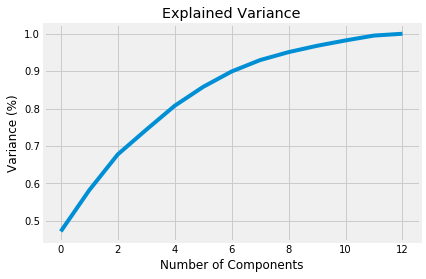

In [70]:
from sklearn.decomposition import PCA

pca = PCA()
principalComponents = pca.fit_transform(df)

## Figure plot (Scree plot)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
#for each component
plt.ylabel('Variance (%)') 
plt.title('Explained Variance')
plt.show()

In [72]:
'''FRom the Scree plot, it can be seen that 11 components are required to explain 99% 
of the variance which is still better than computing using all the 13 features. 
The explained variance threshold can be choosen based on 
the doamin and business requirements.
'''
pca = PCA(n_components=11)
principalComponents = pca.fit_transform(df)
PC_data=pd.DataFrame(principalComponents,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11'])
PC_data.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,-2.098297,0.773113,0.342943,-0.891774,0.423070,-0.315338,0.318641,0.295832,-0.424937,0.640206,-0.033000
1,-1.457252,0.591985,-0.695199,-0.487459,-0.195876,0.264223,0.553861,-0.223670,-0.166962,0.084236,-0.640810
2,-2.074598,0.599639,0.167122,-0.739204,-0.934534,0.448095,0.484560,0.105166,0.069775,-0.180380,-0.487557
3,-2.611504,-0.006871,-0.100284,-0.343721,-1.104956,0.664649,0.622641,0.255941,-0.342246,0.045901,-0.360209
4,-2.458185,0.097712,-0.075348,-0.427907,-1.065924,0.617047,0.705086,-0.134524,-0.417668,-0.140880,-0.395150


***Advantage of using PCA***
- Correlated features are removed.
- Overfitting is reduced.
- Ability to handle noise

## 2.6 Multi- Collinearity

**Origin of the word:** The word multi-collinearity consists of two words:Multi, meaning multiple, and Collinear, meaning being linearly dependent on each other. 

For e.g.,
		Let’s consider this equation
		$ a+b=1  => b=1-a $
        
It means that ‘b’ can be represented in terms of ‘a’ i.e., if the value of ‘a’ changes, automatically the value of ‘b’ will also change. This equation denotes a simple linear relationship among two variables.



**Definition:** The purpose of executing a Linear Regression is to predict the value of a 	dependent variable based on certain independent variables.

So, when we perform a Linear Regression, we want our dataset to have variables which are independent i.e., we should not be able to define an 	independent variable with the help of another independent variable  	because now in our model we have two variables which can be defined based 	on a certain set of independent variables which defeats the entire purpose.

* `Multi-collinearity` is the statistical term to represent this type of a relation amongst the independent variable- when the independent variables are not so independent😊.
* We can define multi-collinearity as the situation where the independent variables (or the predictors) have strong correlation amongst themselves.

The results will be between -1 and 1. You will very rarely see 0,-1 or 1. You'll get a number somewhere in between those values. The closer the value of r gets to zero, the greater the variation the data points are around the line of best fit. 
- High correlation: `0.5 to 1.0 or -0.5 to 1.0` 
- Medium correlation: `0.3 to 0.5 or -0.3 to 0.5` 
- Low correlation: `0.1 to 0.3 or -0.1 to -0.3` 

<img src="FeatureEng_Imgs/FE8.png" width="600"/>

The mathematical flow for multicollinearity can be shown as:

<img src="FeatureEng_Imgs/FE7.png" width="600"/>

### Why Should We Care About Multi-Collinearity?
* The coefficients in a Linear Regression model represent the extent of change in Y when a certain x (amongst X1,X2,X3…) is changed keeping others constant. But, if x1 and x2 are dependent, then this assumption itself is wrong that we are changing one variable keeping others constant as the dependent variable will also be changed. It means that our model itself becomes a bit flawed.
* We have a redundancy in our model as two variables (or more than two) are trying to convey the same information.
* As the extent of the collinearity increases, there is a chance that we might produce an overfitted model. An overfitted model works well with the test data but its accuracy fluctuates when exposed to other data sets. 
* Can result in a Dummy Variable Trap.

### Pearson Correlation
A Pearson product-moment correlation coefficient attempts to establish a line of best fit through a dataset of two variables by essentially laying out the expected values and the resulting Pearson's correlation coefficient indicates how far away the actual dataset is from the expected values. Depending on the sign of our Pearson's correlation coefficient, we can end up with either a negative or positive correlation if there is any sort of relationship between the variables of our dataset.

The population correlation coefficient ${\displaystyle \rho _{X,Y}}{\displaystyle \rho _{X,Y}}$ between two random variables ${\displaystyle X}$ and ${\displaystyle Y}$ with expected values ${\displaystyle \mu _{X}}\mu _{X}$ and ${\displaystyle \mu _{Y}}{\displaystyle \mu _{Y}}$ and standard deviations ${\displaystyle \sigma _{X}}\sigma _{X}$ and ${\displaystyle \sigma _{Y}}\sigma_Y$ is defined as

$${\displaystyle \rho_{X,Y}=\operatorname {corr} (X,Y)={\operatorname {cov} (X,Y) \over \sigma _{X}\sigma _{Y}}={\operatorname {E} [(X-\mu _{X})(Y-\mu _{Y})] \over \sigma _{X}\sigma _{Y}}}$$

>**Note:** where ${E}$  is the expected value operator, ${cov}$  means covariance, and ${corr}$ is a widely used alternative notation for the correlation coefficient. The Pearson correlation is defined only if both standard deviations are finite and positive. [Source](https://en.wikipedia.org/wiki/Covariance)

***The Pearson correlation coefficient has values ranges from -1 to 1***
- A value exact 0 indicates no correlation
- A value closer to 0 indicates weaker correlation 
- A value closer to 1 indicates stronger positive correlation
- A value closer to -1 indicates stronger negative correlation


**Similar to Pearson, there are other method to compute correlation such as;**
- **kendall** : Kendall Tau correlation coefficient
- **spearman** : Spearman rank correlation

>**Note:** `Pearson` consider as standard correlation coefficient

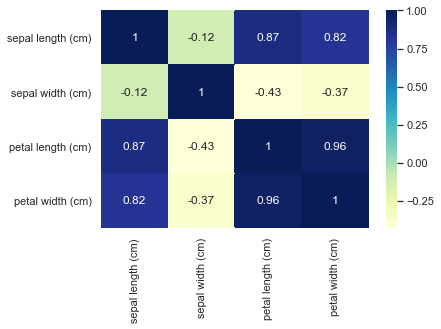

In [6]:
from sklearn.datasets import load_iris
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

## Loading iris dataset
df = load_iris() 
X= pd.DataFrame(df.data, columns = df.feature_names)

#Using Pearson Correlation
plt.figure(figsize=(6,4))
corr = X.corr(method='pearson')

## Graphical view of correlation using heatmap
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()


**Detection**: `Correlation Matrices and Plots` for correlation between all the X independent variable has shown in above plot. Generally, a correlation greater than 0.9 or less than -0.9 is to be avoided.

### Kendall Correlation
It is a measure of rank correlation: the similarity of the orderings of the data when ranked by each of the quantities.[Source](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient)

Intuitively, the Kendall correlation between two variables will be high when observations have a similar (or identical for a `correlation of 1`) rank between the two variables, and low when observations have a dissimilar (or fully different for a `correlation of −1`) rank between the two variables.

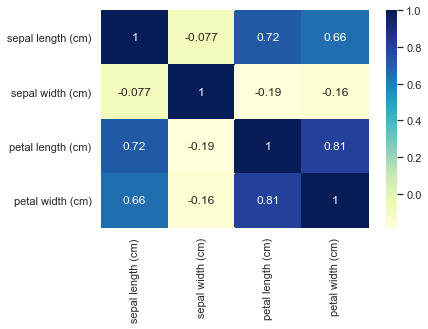

In [7]:
#Using Kendall Correlation
plt.figure(figsize=(6,4))
corr = X.corr(method='kendall')

## Graphical view of correlation using heatmap
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()

### Spearman Correlation
The `Spearman correlation` between two variables is equal to the Pearson correlation between the rank values of those two variables; while Pearson's correlation assesses linear relationships, Spearman's correlation assesses monotonic relationships (whether linear or not). If there are no repeated data values, a perfect Spearman correlation of +1 or −1 occurs when each of the variables is a perfect monotone function of the other. [Source](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient)

Spearman's coefficient is appropriate for both `continuous` and `discrete` ordinal variables.

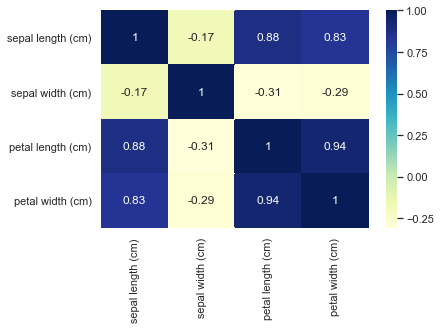

In [8]:
#Using Spearman Correlation
plt.figure(figsize=(6,4))
corr = X.corr(method='spearman')

## Graphical view of correlation using heatmap
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()

### Variance Inflation Factor (VIF)
* __Variance Inflation Factor:__ Regression of one X variable against other X variables.

     $$VIF=\frac {1}{(1-R{squared})}$$

     The VIF factor, if greater than 10 shows extreme correlation between the variables and then we need to take care of the correlation.


In [12]:
from sklearn.datasets import load_boston

boston = load_boston()

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# Finally, I like to include names so it is easier to explore the result
vif["Features"] = boston.feature_names

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(boston.data, i) for i in range(pd.DataFrame(boston.data).shape[1])]

vif

,Features,VIF
0,CRIM,2.100373
1,ZN,2.844013
2,INDUS,14.485758
3,CHAS,1.152952
4,NOX,73.894947
5,RM,77.948283
6,AGE,21.386850
7,DIS,14.699652
8,RAD,15.167725
9,TAX,61.227274


>**Note:** When number of columns are more go for VIF method

### Pairplot by Seaborn

In [34]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

from sklearn.datasets import load_iris

df = load_iris()
data=pd.DataFrame(df.data,columns=df.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


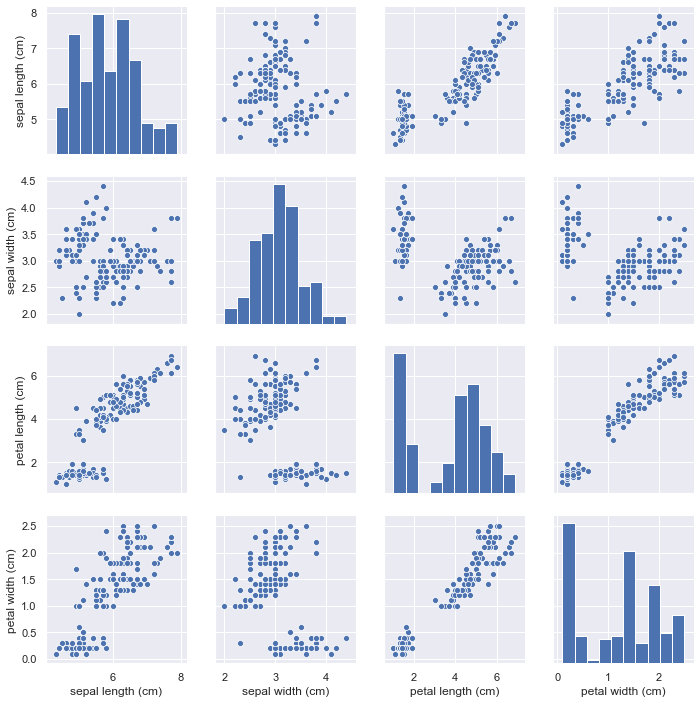

In [35]:
sns.pairplot(data=data)

>**Note:** Its very helpful to analyze the collinearity in dataset

### Remedies for Multicollinearity

* **Do Nothing:** If the Correlation is not that extreme, we can ignore it. If the correlated variables are not used in solving our business question, they can be ignored.
* **Remove One Variable**: Like in dummy variable trap
* **Combine the correlated variables:** Like creating a seniority score based on Age and Years of experience
* **Principal Component Analysis**

 ## 2.7 Feature Scaling 
Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step. [Wiki](https://en.wikipedia.org/wiki/Feature_scaling)

- In feature scaling we scale down value with some magnitude and unit.
- Feature are depends upon the magnitude and units. `Example:-` $500 kg$, $500$ is magnitude and $kg$ is unit.
<img src="FeatureEng_Imgs/FE6.png" width="500"/>
[Image Source](https://medium.com/lets-talk-ml/scaling-the-data-for-machine-learning-standardisation-and-normalisation-26ae02b1d101)

**Note:** Wherever the Euclidean Distance, Manhattan Distance or Minkowski Distance is user in the Learning Algorithm, the `Feature Scaling` is required to perform for optimize result. Distance based algorithm are sensitive towards the magnitude.

***There are four common methods to perform feature scaling;***
- Standarization
- Mean Normalization
- Min-Max Scaling
- Unit Vector

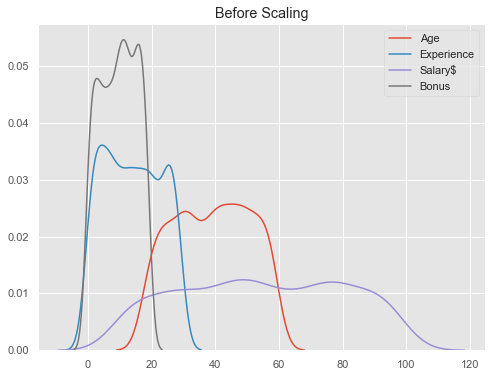

,Age,Experience,Salary$,Bonus
0,59.0,27.0,73.0,14.0
1,52.0,12.0,78.0,11.0
2,39.0,18.0,79.0,14.0
3,37.0,7.0,47.0,9.0
4,49.0,10.0,52.0,4.0


In [71]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

## Generating a dataframe of employees details
data = pd.DataFrame({
    'Age': np.random.randint(18, 60, 1000).astype(float),
    'Experience': np.random.randint(0, 30, 1000).astype(float),
    'Salary$': np.random.randint(10, 100, 1000).astype(float),
    'Bonus': np.random.randint(0, 20, 1000).astype(float),
})

plt.figure(figsize=(8,6))
plt.title('Before Scaling')
sns.kdeplot(data['Age'])
sns.kdeplot(data['Experience'])
sns.kdeplot(data['Salary$'])
sns.kdeplot(data['Bonus'])
plt.show()

data.head()

### Standardization (Z-score Normalization)

- Feature standardization makes the values of each feature in the data have zero-mean (when subtracting the mean in the numerator) and unit-variance. 
- This method is widely used for normalization in many machine learning algorithms (e.g., support vector machines, logistic regression, and artificial neural networks).

$$x' = \frac{x - \bar{x}}{\sigma}$$

Where $x$ is the original feature vector, ${\bar {x}}={\text{average}}(x)$ is the mean of that feature vector, and $\sigma$  is its standard deviation.

***In simple statistic form we can say, it replce the values by their $Z-score$ and re-scales a feature value so that it has distribution with `0` mean value and variance equals to `1`.***

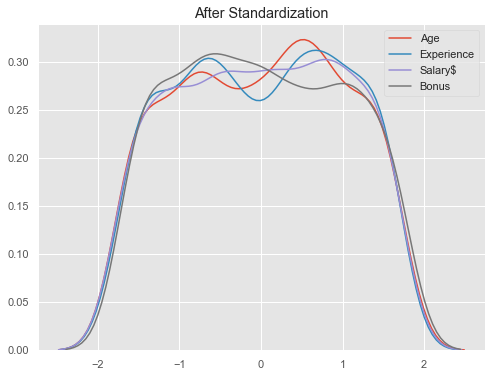

,Age,Experience,Salary$,Bonus
0,1.316667,0.716035,-0.493433,1.692167
1,1.063511,0.946939,-0.377586,-1.287618
2,0.725969,-0.207583,-1.729140,-0.586492
3,1.063511,-1.708462,-0.493433,-0.411210
4,-1.383669,-0.669392,0.896737,0.114634


In [64]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=['Age', 'Experience', 'Salary$','Bonus'])

plt.figure(figsize=(8,6))
plt.title('After Standardization')
sns.kdeplot(scaled_data['Age'])
sns.kdeplot(scaled_data['Experience'])
sns.kdeplot(scaled_data['Salary$'])
sns.kdeplot(scaled_data['Bonus'])
plt.show()

scaled_data.head()

### Mean normalization

$$ x'={\frac {x-{\text{average}}(x)}{{\text{max}}(x)-{\text{min}}(x)}}$$

where $x$ is an original value, $x'$ is the normalized value. There is another form of the means normalization which is when we divide by the standard deviation which is also called `standardization`.


In [74]:
X_std = (data - data.mean(axis=0)) / (data.max(axis=0) - data.min(axis=0))
X_std.head()

,Age,Experience,Salary$,Bonus
0,0.487439,0.443621,0.206213,0.228053
1,0.316707,-0.073621,0.262393,0.070158
2,-0.000366,0.133276,0.273629,0.228053
3,-0.049146,-0.246034,-0.085921,-0.035105
4,0.243537,-0.142586,-0.029742,-0.298263


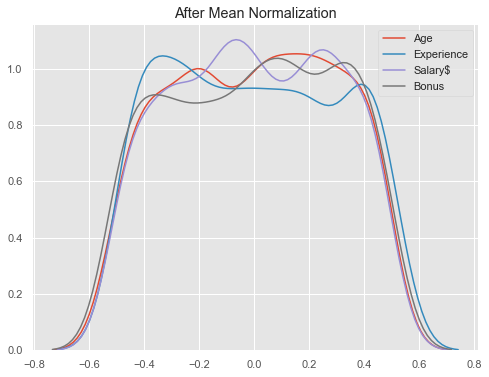

,Age,Experience,Salary$,Bonus
0,0.487439,0.443621,0.206213,0.228053
1,0.316707,-0.073621,0.262393,0.070158
2,-0.000366,0.133276,0.273629,0.228053
3,-0.049146,-0.246034,-0.085921,-0.035105
4,0.243537,-0.142586,-0.029742,-0.298263


In [75]:
from sklearn import preprocessing

scaled_data = X_std

plt.figure(figsize=(8,6))
plt.title('After Mean Normalization')
sns.kdeplot(scaled_data['Age'])
sns.kdeplot(scaled_data['Experience'])
sns.kdeplot(scaled_data['Salary$'])
sns.kdeplot(scaled_data['Bonus'])
plt.show()

scaled_data.head()

### Min-Max scaling
Also known as min-max normalization, is the simplest method and consists in rescaling the range of features to scale the range in [0, 1] or [−1, 1]. Selecting the target range depends on the nature of the data. The general formula for a min-max of [0, 1] is given as:

$$x'={\frac  {x-{\text{min}}(x)}{{\text{max}}(x)-{\text{min}}(x)}}$$

where $x$ is an original value, $x'$ is the normalized value. 

```python
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min ## To scaled as per the requirement
```

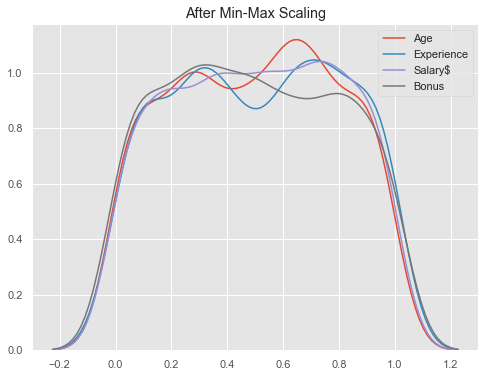

,Age,Experience,Salary$,Bonus
0,0.878049,0.724138,0.359551,1.000000
1,0.804878,0.793103,0.393258,0.105263
2,0.707317,0.448276,0.000000,0.315789
3,0.804878,0.000000,0.359551,0.368421
4,0.097561,0.310345,0.764045,0.526316


In [66]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=['Age', 'Experience', 'Salary$','Bonus'])

plt.figure(figsize=(8,6))
plt.title('After Min-Max Scaling')
sns.kdeplot(scaled_data['Age'])
sns.kdeplot(scaled_data['Experience'])
sns.kdeplot(scaled_data['Salary$'])
sns.kdeplot(scaled_data['Bonus'])
plt.show()

scaled_data.head()

### Max-Abs Scaling
`MaxAbsScaler` works in a very similar fashion like min-max scaling, but scales in a way that the training data lies within the range [-1, 1] by dividing through the largest maximum value in each feature. It is meant for data that is already centered at zero or sparse data.

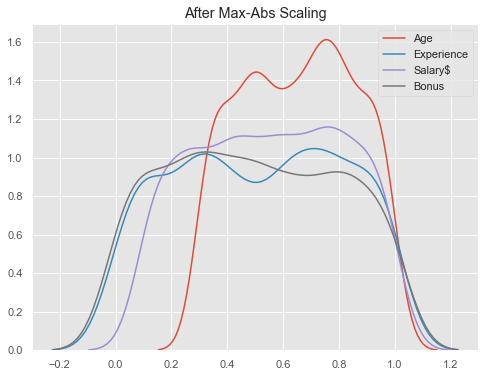

,Age,Experience,Salary$,Bonus
0,0.915254,0.724138,0.424242,1.000000
1,0.864407,0.793103,0.454545,0.105263
2,0.796610,0.448276,0.101010,0.315789
3,0.864407,0.000000,0.424242,0.368421
4,0.372881,0.310345,0.787879,0.526316


In [68]:
from sklearn import preprocessing

scaler = preprocessing.MaxAbsScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=['Age', 'Experience', 'Salary$','Bonus'])

plt.figure(figsize=(8,6))
plt.title('After Max-Abs Scaling')
sns.kdeplot(scaled_data['Age'])
sns.kdeplot(scaled_data['Experience'])
sns.kdeplot(scaled_data['Salary$'])
sns.kdeplot(scaled_data['Bonus'])
plt.show()

scaled_data.head()

### Robust Scaling

- This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

- Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Median and interquartile range are then stored to be used on later data using the transform method.

- Standardization of a dataset is a common requirement for many machine learning estimators. Typically this is done by removing the mean and scaling to unit variance. However, outliers can often influence the sample mean / variance in a negative way. In such cases, the median and the interquartile range often give better results.

$$x'={\frac  {x_i–Q_1(x)}{Q_3(x)–Q_1(x)}}$$

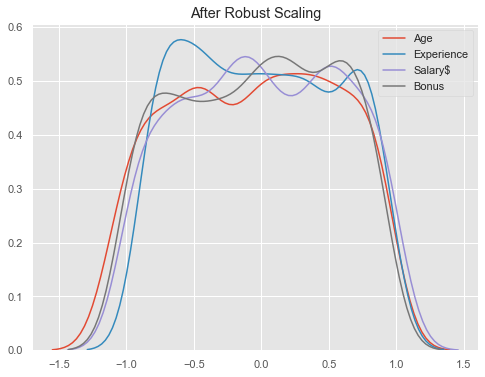

,Age,Experience,Salary$,Bonus
0,0.95,0.8125,0.431818,0.4
1,0.60,-0.1250,0.545455,0.1
2,-0.05,0.2500,0.568182,0.4
3,-0.15,-0.4375,-0.159091,-0.1
4,0.45,-0.2500,-0.045455,-0.6


In [77]:
from sklearn import preprocessing

scaler = preprocessing.RobustScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=['Age', 'Experience', 'Salary$','Bonus'])

plt.figure(figsize=(8,6))
plt.title('After Robust Scaling')
sns.kdeplot(scaled_data['Age'])
sns.kdeplot(scaled_data['Experience'])
sns.kdeplot(scaled_data['Salary$'])
sns.kdeplot(scaled_data['Bonus'])
plt.show()

scaled_data.head()

### Comparision of Scaling Techniques

<img src="FeatureEng_Imgs/FeatureScaling1.png" width="400"/>
<img src="FeatureEng_Imgs/FeatureScaling2.png" width="400"/>
<img src="FeatureEng_Imgs/FeatureScaling3.png" width="400"/>
<img src="FeatureEng_Imgs/FeatureScaling4.png" width="400"/>
<img src="FeatureEng_Imgs/FeatureScaling5.png" width="400"/>
<img src="FeatureEng_Imgs/FeatureScaling6.png" width="400"/>

### Unit Vector
 
Another option that is widely used in machine-learning is to scale the components of a feature vector such that the complete vector has length one. This usually means dividing each component by the Euclidean length of the vector:

$${\displaystyle x'={\frac {x}{\left\|{x}\right\|}}}$$

There are different ways to define “length” such as as L1 or L2-normalization. It can be more practical to use the L1 norm of the feature vector. 


####  Max Normalization
The max norm uses the absolute maximum and does for samples what the MaxAbsScaler does for features.

$$x_{normalized} = \frac{ x} {max(x)}$$

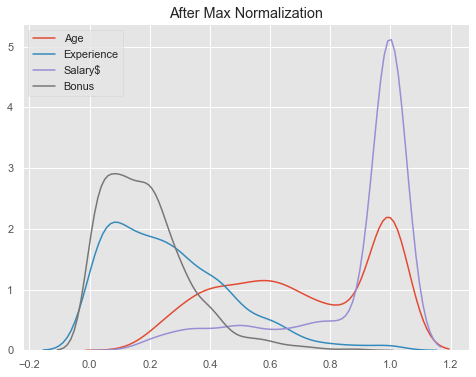

,Age,Experience,Salary$,Bonus
0,0.808219,0.369863,1.0,0.191781
1,0.666667,0.153846,1.0,0.141026
2,0.493671,0.227848,1.0,0.177215
3,0.787234,0.148936,1.0,0.191489
4,0.942308,0.192308,1.0,0.076923


In [82]:
from sklearn import preprocessing

scaled_data = preprocessing.normalize(data,norm='max')
scaled_data = pd.DataFrame(scaled_data, columns=['Age', 'Experience', 'Salary$','Bonus'])

plt.figure(figsize=(8,6))
plt.title('After Max Normalization')
sns.kdeplot(scaled_data['Age'])
sns.kdeplot(scaled_data['Experience'])
sns.kdeplot(scaled_data['Salary$'])
sns.kdeplot(scaled_data['Bonus'])
plt.show()

scaled_data.head()

#### L1 Normalization
The l1 norm uses the sum of all the values as and thus gives equal penalty to all parameters, enforcing sparsity.

$$x_{normalized} = \frac{ x} {sum(x)}$$

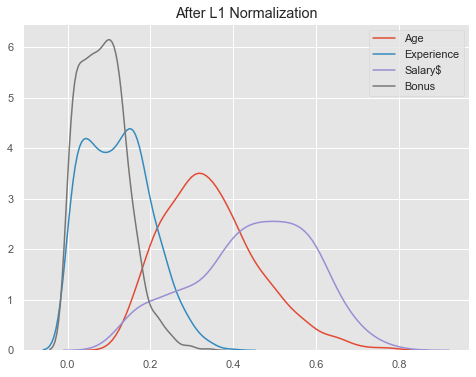

,Age,Experience,Salary$,Bonus
0,0.341040,0.156069,0.421965,0.080925
1,0.339869,0.078431,0.509804,0.071895
2,0.260000,0.120000,0.526667,0.093333
3,0.370000,0.070000,0.470000,0.090000
4,0.426087,0.086957,0.452174,0.034783


In [83]:
from sklearn import preprocessing

scaled_data = preprocessing.normalize(data,norm='l1')
scaled_data = pd.DataFrame(scaled_data, columns=['Age', 'Experience', 'Salary$','Bonus'])

plt.figure(figsize=(8,6))
plt.title('After L1 Normalization')
sns.kdeplot(scaled_data['Age'])
sns.kdeplot(scaled_data['Experience'])
sns.kdeplot(scaled_data['Salary$'])
sns.kdeplot(scaled_data['Bonus'])
plt.show()

scaled_data.head()

#### L2 Normalization
The l2 norm uses the square root of the sum of all the squared values. This creates smoothness and rotational invariance. Some models, like PCA, assume rotational invariance, and so l2 will perform better.

```python
x_normalized = x / sqrt(sum((i**2) for i in X))
```

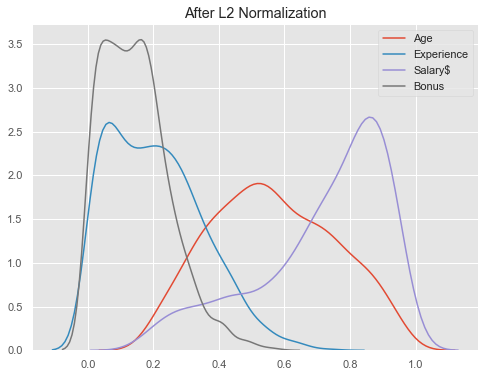

,Age,Experience,Salary$,Bonus
0,0.597976,0.273650,0.739869,0.141893
1,0.546521,0.126120,0.819782,0.115610
2,0.428546,0.197790,0.868079,0.153837
3,0.607620,0.114955,0.771841,0.147799
4,0.678140,0.138396,0.719659,0.055358


In [84]:
from sklearn import preprocessing

scaled_data = preprocessing.normalize(data,norm='l2')
scaled_data = pd.DataFrame(scaled_data, columns=['Age', 'Experience', 'Salary$','Bonus'])

plt.figure(figsize=(8,6))
plt.title('After L2 Normalization')
sns.kdeplot(scaled_data['Age'])
sns.kdeplot(scaled_data['Experience'])
sns.kdeplot(scaled_data['Salary$'])
sns.kdeplot(scaled_data['Bonus'])
plt.show()

scaled_data.head()

### Feature Scaling requirement in Machine Learning algorithm

|ML Algorithm|Feature Scaling requirement|
|-|-|
|k-mean|Yes|
|KNN|Yes|
|PCA|Yes|
|Linear Regression|Yes|
|Naive Bayes|No|
|Tree based Model|No|
|XGBoost|No|

>**Note:** Any algorithm which is not based on distance formula will affected by `Feature Scaling`.

## 2.8 Categorical Encoding
Many machine learning algorithms cannot work with categorical data directly. They require data to be numeric. Therefore, it is essential to know how to encode categorical variables.

**There are several different types of categorical data such as:**

- **Binary:** A variable that has only 2 values. Example:- Yes/No or True/False.
- **Nominal:** A variable that has no numerical importance. Example:- state name or color.
- **Ordinal:** A variable that has some order associated with it. Example:- Education or Designation

For encoding categorical data, we have a python package category_encoders. The following code helps you install easily.

```cmd
pip install category_encoders
```

### 2.8.1 Binary Categorical Encoding

Binary features are those with only two possible values.

#### Find and Replace
Here we pass a dictionary to `replace()` with the current value as the key and the desired value as the value.

In [12]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

## Generating a dataframe of school student details 
data = pd.DataFrame({
    'Name':['Sudhanshu','Ram','Jhon','Nilesh','Nita','Krish','Sudhesna'],
    'City': ['Jamshedpur','Ranchi','Dhanbad','Dhanbad','Jamshedpur','Ranchi','Bokaro'],
    'Gender': ['Male','Male','Male','Male','Female','Male','Female'],
    'Education': ['class-12','class-10','class-12','class-9','class-8','class-12','class-11'],
    'HouseColor': ['Yellow','Red','Yellow','Green','Blue','Blue','Yellow'],
    'HouseCaptain':[True,False,False,True,False,True,False]
})
## Saving data in numpy format
np.save('Datasets/student.npy',data)
data

,Name,City,Gender,Education,HouseColor,HouseCaptain
0,Sudhanshu,Jamshedpur,Male,class-12,Yellow,True
1,Ram,Ranchi,Male,class-10,Red,False
2,Jhon,Dhanbad,Male,class-12,Yellow,False
3,Nilesh,Dhanbad,Male,class-9,Green,True
4,Nita,Jamshedpur,Female,class-8,Blue,False
5,Krish,Ranchi,Male,class-12,Blue,True
6,Sudhesna,Bokaro,Female,class-11,Yellow,False


In [6]:
data['Gender'] = data['Gender'].replace({'Male':1, 'Female':0})
data['HouseCaptain'] = data['HouseCaptain'].replace({True:1, False:0})

data

,Name,City,Gender,Education,HouseColor,HouseCaptain
0,Sudhanshu,Jamshedpur,1,class-12,Yellow,1
1,Ram,Ranchi,1,class-10,Red,0
2,Jhon,Dhanbad,1,class-12,Yellow,0
3,Nilesh,Dhanbad,1,class-9,Green,1
4,Nita,Jamshedpur,0,class-8,Blue,0
5,Krish,Ranchi,1,class-12,Blue,1
6,Sudhesna,Bokaro,0,class-11,Yellow,0


### 2.8.2 Nominal Features Encoding

Nominal features are categorical features that have no numerical importance. Order does not matter.


#### One Hot Encoding

In [19]:
import numpy as np
import pandas as pd
import category_encoders as ce 

''' If you will get error try to replace C:\ProgramData\Anaconda3\Lib\site-packages\statsmodels\distributions\edgeworth.py
Changing the
from scipy.misc import factorial
to
from scipy.special import factorial
'''
data= np.load('Datasets/student.npy',allow_pickle=True)

data= pd.DataFrame(data,columns=['Name','City','Gender','Education','HouseColor','HouseCaptain'])

Encoder = ce.OneHotEncoder(cols=['Gender','HouseCaptain'])

#Fit and Transform Data 
data_encoded=Encoder.fit_transform(data) 
data_encoded

,Name,City,Gender_1,Gender_2,Education,HouseColor,HouseCaptain_1,HouseCaptain_2
0,Sudhanshu,Jamshedpur,1,0,class-12,Yellow,1,0
1,Ram,Ranchi,1,0,class-10,Red,0,1
2,Jhon,Dhanbad,1,0,class-12,Yellow,0,1
3,Nilesh,Dhanbad,1,0,class-9,Green,1,0
4,Nita,Jamshedpur,0,1,class-8,Blue,0,1
5,Krish,Ranchi,1,0,class-12,Blue,1,0
6,Sudhesna,Bokaro,0,1,class-11,Yellow,0,1


#### One-hot-encoding with many categories

In [20]:
## Here we will hamdle multple categories in features
Encoder = ce.OneHotEncoder(cols=['Name','City','Gender','Education','HouseColor','HouseCaptain'])

#Fit and Transform Data 
data_encoded=Encoder.fit_transform(data) 
data_encoded

,Name_1,Name_2,Name_3,Name_4,Name_5,Name_6,Name_7,City_1,City_2,City_3,...,Education_2,Education_3,Education_4,Education_5,HouseColor_1,HouseColor_2,HouseColor_3,HouseColor_4,HouseCaptain_1,HouseCaptain_2
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
4,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
5,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
6,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1


#### Dummy Encoding
- Dummy coding scheme is similar to one-hot encoding. 
- In the case of one-hot encoding, for `k` categories in a variable, it uses k binary variables. 
- The dummy encoding is a small improvement over one-hot-encoding. Dummy encoding uses `k-1` features to represent `k` labels/categories.
- The `drop_first` parameter is helpful to get `k-1` dummies.

In [22]:
import numpy as np
import pandas as pd

data= np.load('Datasets/student.npy',allow_pickle=True)

data= pd.DataFrame(data,columns=['Name','City','Gender','Education','HouseColor','HouseCaptain'])

data_encoded = pd.get_dummies(data[['Gender','HouseCaptain']])

data_encoded

,Gender_Female,Gender_Male,HouseCaptain_False,HouseCaptain_True
0,0,1,0,1
1,0,1,1,0
2,0,1,1,0
3,0,1,0,1
4,1,0,1,0
5,0,1,0,1
6,1,0,1,0


In [23]:
data_encoded = pd.get_dummies(data[['Gender','HouseCaptain']],drop_first=True)

data_encoded

,Gender_Male,HouseCaptain_True
0,1,1
1,1,0
2,1,0
3,1,1
4,0,0
5,1,1
6,0,0


### 2.8.3 Ordinal Encoding

Ordinal features are categorical features that have numerical importance. Order does matter.

#### Label Encoding

This categorical data encoding technique when the categorical feature is ordinal.

In [28]:
import pandas as pd
import category_encoders as ce 

data=pd.DataFrame({'Degree':['High school','High school','Masters','None','Bachelors','Bachelors','Diploma','Masters','Phd','High school']})
#Original data
data

,Degree
0,High school
1,High school
2,Masters
3,None
4,Bachelors
5,Bachelors
6,Diploma
7,Masters
8,Phd
9,High school


In [29]:
##create object of Ordinalencoding
Encoder= ce.OrdinalEncoder(cols=['Degree'],return_df=True,mapping=[{'col':'Degree','mapping':
                                                                    {'None':0,'High school':1,'Diploma':2,
                                                                     'Bachelors':3,'Masters':4,'Phd':5}}])

#fit and transform train data 
data_encoded = Encoder.fit_transform(data)
#Encoded data
data_encoded

,Degree
0,1
1,1
2,4
3,0
4,3
5,3
6,2
7,4
8,5
9,1


#### Target Guided Ordinal Encoding
1. Ordering the labels according to the target
2. Replace the labels by the joint probability of being 1 or 0

In [33]:
import pandas as pd

data=pd.read_csv('Datasets/titanic.csv',usecols=['Cabin','Survived'])
data.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [34]:
data['Cabin'].fillna('Missing',inplace=True)

In [36]:
## Considering only first letter of word
data['Cabin']=data['Cabin'].astype(str).str[0]
data.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [37]:
data.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [39]:
## Sorting values in ordinal labels
ordinal_labels=data.groupby(['Cabin'])['Survived'].mean().sort_values().index
ordinal_labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [40]:
## Mapping value as per the order
ordinal_labels_map={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels_map

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [42]:
data['Cabin_ordinal_labels']=data['Cabin'].map(ordinal_labels_map)
data.head(10)

,Survived,Cabin,Cabin_ordinal_labels
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1
5,0,M,1
6,0,E,7
7,0,M,1
8,1,M,1
9,1,M,1


#### Mean Encoding
Mean encoding represents a probability of your target variable, conditional on each value of the feature.

In [44]:
import pandas as pd

data=pd.read_csv('Datasets/titanic.csv',usecols=['Cabin','Survived'])

## Considering only first letter of word
data['Cabin']=data['Cabin'].astype(str).str[0]

mean_ordinal=data.groupby(['Cabin'])['Survived'].mean().to_dict()
mean_ordinal

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'T': 0.0,
 'n': 0.29985443959243085}

In [46]:
data['mean_ordinal_encode']=data['Cabin'].map(mean_ordinal)
data.head(10)

,Survived,Cabin,mean_ordinal_encode
0,0,n,0.299854
1,1,C,0.593220
2,1,n,0.299854
3,1,C,0.593220
4,0,n,0.299854
5,0,n,0.299854
6,0,E,0.750000
7,0,n,0.299854
8,1,n,0.299854
9,1,n,0.299854
